In [ ]:
# intensity Adjustment = untuk melakukan pemetaan linear terhadap nilai intensitas pada 
# histogram awal menjadi nilai intensitas pada histogram yang baru

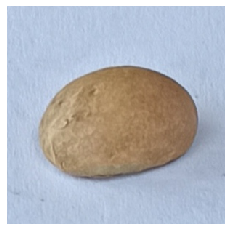

In [4]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Open the image. 
img = mpimg.imread('C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel A/A1 (1).jpg') 

plt.axis('off')
plt.imshow(img)
plt.show()

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A14 (1)

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A5 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A5 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A50 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A50 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A50 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A6 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A6 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A6 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A7 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A7 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A7 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A8 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A8 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A8 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A9 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A9 (2).jpg
C:/Us

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B44 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B45 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B45 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B45 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C4 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C4 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C4 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C40 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C40 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C40 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C41 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C41 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C41 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C44 (1)

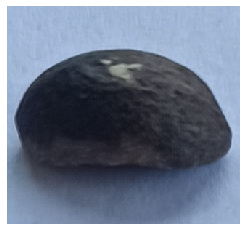

In [93]:
import numpy as np 
import cv2 
import os
import re
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# -------------------- Load Dataset ------------------------
 
dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi"

for folder in ["Sampel A","Sampel B","Sampel C"]:
    for image_file in os.listdir(os.path.join(dataset_dir, folder)):
        img = mpimg.imread("%s/%s/%s" % (dataset_dir, folder, image_file)) 
  
        # Trying 4 gamma values. 
        for gamma in [1.2]: 

            # Apply gamma correction. 
            gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
            print("%s/%s/%s" % (dataset_dir, "Sampel Kopi Done", image_file))
            # Save edited images. 
            cv2.imwrite(("%s/%s/%s" % (dataset_dir, "Sampel Intensity", image_file)), gamma_corrected)

        plt.axis("off")
        plt.imshow(img)
        plt.show

In [ ]:
# GrayScale = untuk mengubah citra warna menjadi citra keabuan

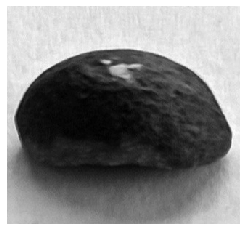

In [95]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as img
# Reading color image

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Intensity"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Greyscale"

for image_file in os.listdir(dataset_dir):
    #for image_file in os.listdir(os.path.join(dataset_dir, folder)):
    img = mpimg.imread("%s/%s" % (dataset_dir, image_file))

    # Converting color image to grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(("%s/%s" % (target_dir, image_file)),gray)
    # Showing the converted image

plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
#Thresholding = untuk memisahkan antara objek dengan background 
# dalam suatu citra berdasarkan pada perbedaan tingkat kecerahannya atau gelap terang nya

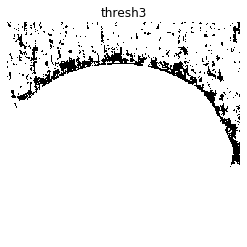

In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Greyscale"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding"

for image_file in os.listdir(dataset_dir):
    
    img = cv2.imread("%s/%s" % (dataset_dir, image_file),0)
    img = cv2.medianBlur(img,5)

    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,9,2)
    cv2.imwrite(("%s/%s" % (target_dir, image_file)) + 'threshold.jpg',thresh3)

thresh = ['thresh3']

for i in range(1):
    plt.subplot(1,1,i+1),plt.imshow(eval(thresh[i]),'gray')
    plt.title(thresh[i])

plt.axis('off')
plt.show()

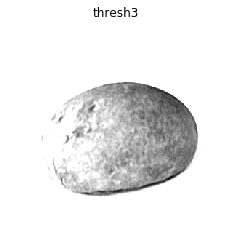

In [103]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("C:/Users/epen/SKRIPSI/a-greyscale.png",0)
ret,thresh3 = cv2.threshold(img,130,255,cv2.THRESH_TRUNC)

thresh = ['thresh3']

for i in range(1):
    plt.subplot(1,1,i+1),plt.imshow(eval(thresh[i]),'gray')
    plt.title(thresh[i])
plt.axis("off")
plt.show()

In [ ]:
#Histogram = untuk meratakan persebaran nilai intensitas piksel suatu citra

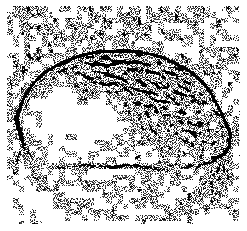

In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as img

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Histogram"

for image_file in os.listdir(dataset_dir):

    img = cv2.imread("%s/%s" % (dataset_dir, image_file),0)

    equ = cv2.equalizeHist(img)

    # stacking images side-by-side
    res = np.hstack((img, equ))
    cv2.imwrite(("%s/%s" % (target_dir, image_file)),equ)
# show image input vs output
plt.axis('off')
plt.imshow(equ, cmap='gray')
plt.show()

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/epen/SKRIPSI/a-Histogram.png')
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram

(array([31857.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

In [ ]:
#Ekstrasi Fitur

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A14 (1)

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A6 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A6 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A6 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A7 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A7 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A7 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A8 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A8 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A8 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A9 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A9 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A9 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B1 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B1 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B1 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B10 (1).jpg
C:/User

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B5 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B5 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B5 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B50 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B50 (2)

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C44 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C44 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C44 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C45 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C45 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C45 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C46 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C46 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C46 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C47 

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA3 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA3 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA3 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA30 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA30 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA30 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA31 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA31 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA31 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA32 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel AA32 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi 

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB13 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB14 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB14 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB14 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB15 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB15 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB15 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB16 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB16 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB16 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB17 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Ko

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB43 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB43 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB43 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB44 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB44 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB44 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB45 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB45 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB45 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB46 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel BB46 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Ko

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC26 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC26 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC27 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC27 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC27 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC28 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC28 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC28 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC29 (1).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC29 (2).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/Sampel CC29 (3).jpgIntensity1.2.jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Ko

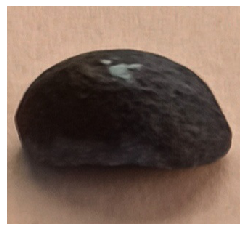

In [16]:
import numpy as np 
import cv2 
import os
import re
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# -------------------- Load Dataset ------------------------
 
dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi"

for folder in os.listdir(dataset_dir):
    for image_file in os.listdir(os.path.join(dataset_dir, folder)):
        img = mpimg.imread("%s/%s/%s" % (dataset_dir, folder, image_file)) 
  
        # Trying 4 gamma values. 
        for gamma in [1.2]: 

            # Apply gamma correction. 
            gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
            print("%s/%s/%s" % (dataset_dir, "Sampel Kopi Done", image_file))
            # Save edited images. 
            cv2.imwrite(("%s/%s/%s%s" % (dataset_dir, "Sampel Kopi Done", folder, image_file)) + 'Intensity'+str(gamma)+'.jpg', gamma_corrected)

        plt.axis("off")
        plt.imshow(img)
        plt.show

In [139]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [159]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("glcm_coffee_dataset.csv")

In [36]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import pandas as pd

img = io.imread('C:/Users/epen/SKRIPSI/a-Histogram.png')

gray = color.rgb2gray(img)
image = img_as_ubyte(gray)

bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
inds = np.digitize(image, bins)

max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

# GLCM properties
def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return "Contrast = ", contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
	return "Dissimilarity = ", dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return "Homogeneity = ", homogeneity

def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return "Energy = ", energy

def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return "Correlation = ", correlation

def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return "ASM = ", asm

print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

('Contrast = ', array([[5.82207358, 8.15326971, 5.77538451, 7.74605868]]))
('Dissimilarity = ', array([[0.3638796 , 0.50957936, 0.36096153, 0.48412867]]))
('Homogeneity = ', array([[0.97734602, 0.96827522, 0.97752769, 0.96985969]]))
('Energy = ', array([[0.82086008, 0.81501641, 0.82100627, 0.81593114]]))
('Correlation = ', array([[0.92518024, 0.89554851, 0.92576414, 0.90076529]]))
('ASM = ', array([[0.67381127, 0.66425175, 0.6740513 , 0.66574362]]))
